<a href="https://colab.research.google.com/github/sarahJune1/BUS509_sachss/blob/main/notebooks/Module_5/Probability_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy
import numpy as np

# Probability Distributions

This module includes topics on probability distributions. This will build upon the previous module of probability with new concepts about measuring and interpreting summary measures. We will learn about randomness and different distributions such as binomial, Poisson, and hypergeometric. 


## Binomial Distribution

In the United States, about 30% of adults have four-year college degrees (U.S. Census Bureau, July 31, 2018). Suppose five adults are randomly selected.

a) What is the probability that none of the adults has a college degree?

b) What is the probability that no more than two of the adults have a college degree?

c) What is the probability that at least two of the adults have a college degree?

d) Calculate the expected value, the variance, and the standard deviation of this binomial distribution.

e) Graphically depict the probability distribution and comment on its symmetry/skewness.

In [2]:
# define variables as it relates to formula
n = 5 # sample is 5
p = .3 # likelihood of success
q = 1 - .3 # likelihood of not success

In [3]:
def calc_prob(n, p, x):
  """
  Inputs the variables and applies the binomial distribution formula
  """
  first_term = math.factorial(n)/((math.factorial(x) * math.factorial(n-x)))
  second_term = p**x*(1-p)**(n-x)
  return first_term * second_term

In [4]:
# probability of seeing none of the 5 adults having a college degree
x = 0
calc_prob(n, p, x)

0.16806999999999994

This can be interpreted as out of 5 adults, there is a 16.81% chance that none of the adults have a college degree.

In [5]:
# probability of no more than 2 having degree
calc_prob(n, p, 0) + calc_prob(n, p, 1) + calc_prob(n, p, 2)

0.8369199999999999

Out of a random sample, there is a 83.69% chance that no more than 2 will have a college degree. We add up probability that no one has it, with 1 person or 2 people.

In [6]:
# probability that at least 2 have a college degree
calc_prob(n, p, 2) + calc_prob(n, p, 3) + calc_prob(n, p, 4) + calc_prob(n, p, 5)

0.47177999999999987

Out of a random sample, there is 47.18% chance that at least 2 will have a college degree. We add up the probabilities for any outcome that is greater than 2. 

In [7]:
# calculate the mean
np_mean = n * p
print(f"Out of {n} randomly sampled adults, the average number of adults with a degree is {np_mean} adults.")

Out of 5 randomly sampled adults, the average number of adults with a degree is 1.5 adults.


In [8]:
# variance
var = np_mean * (1-p)
print(f"The variance of adults with college degree is {round(var,2)} adults squared")

The variance of adults with college degree is 1.05 adults squared


In [9]:
# standard deviation
sd = math.sqrt(var)
print(f"The average number of adults with college degree will deviate by {round(sd,2)} adults")

The average number of adults with college degree will deviate by 1.02 adults


We can use the scipy package to generate the probability mass function, and use the probability and mean to calculate the probability for each outcome.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html

In [11]:
# set the seed
random.seed(42)

In [12]:
# visualize
r_values = list(range(n + 1))

dist = [scipy.stats.binom.pmf(r, n, p) for r in r_values]
dist

[0.16807000000000002,
 0.3601499999999999,
 0.3086999999999999,
 0.13229999999999992,
 0.028349999999999976,
 0.002429999999999999]

In [13]:
r_values

[0, 1, 2, 3, 4, 5]

In [14]:
sum(dist)

0.9999999999999998

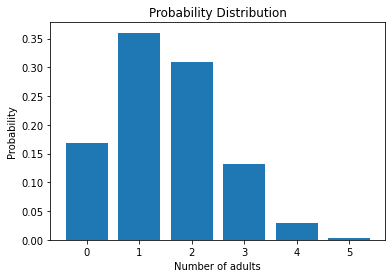

In [15]:
plt.bar(r_values, dist)
plt.xlabel('Number of adults')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

This can be interpreted as the liklihood for each outcome, for example there is about a .16 percent chance that no adult has a college degree. 

Note that when probability of success and failure are equally likely, we will see a normal distribution. 

In [16]:
# probability mass function - pmf
scipy.stats.binom.pmf(2, n, p)

0.3086999999999999

In [17]:
# cumulative distribution function - cdf
scipy.stats.binom.cdf(2, n, p)

0.8369199999999999

Return to lecture

## Poisson Distribution

In [18]:
def calc_poisson_prob(lmbda, x):
  """
  Calculate the poisson distribution
  """
  first_term = math.e**-lmbda*lmbda**x
  second_term = math.factorial(x)
  return first_term/second_term

In [19]:
# calculate average rate given interval
rate = 18/30
interval = 5
lmbda = rate * interval
lmbda

3.0

In [20]:
# probability for 5 day period
calc_poisson_prob(lmbda, 5)

0.10081881344492451

What is the probability that a customer visits the chain no more than 2 times in a 5 day period?

In [21]:
calc_poisson_prob(lmbda, 0) + calc_poisson_prob(lmbda, 1) + + calc_poisson_prob(lmbda, 2)

0.4231900811268436

There is a 42% chance that a customer visits the chain no more than 2 times in a 5 day period.

In [22]:
# calculate the probability the customer visits the chain no more than 2 times

scipy.stats.poisson.cdf(2, lmbda)

0.42319008112684364

What is the probability a customer visits the chain at least 3 times? Since this is an inifinite liklihood, a coffee lover might come in many times per day. Therefore we can reverse the area under the curve and subtract the previous calculation by 1 to approximate greater than 3.

In [23]:
1 - (calc_poisson_prob(lmbda, 0) + calc_poisson_prob(lmbda, 1) + + calc_poisson_prob(lmbda, 2))

0.5768099188731564

There is a 58% chance a customer will visit at least 3 times in a 5 day period.

In [24]:
# or we can use python's probability distribution function.

# if we feed in interval, it will calculate for each
interval = [0,1,2]

In [25]:
scipy.stats.poisson.pmf(interval, lmbda)

array([0.04978707, 0.14936121, 0.22404181])

In [26]:
scipy.stats.poisson.pmf(interval, lmbda).sum()

0.42319008112684353

In [27]:
1 - scipy.stats.poisson.pmf(interval, lmbda).sum()

0.5768099188731565

What does the distribution look like over the 5 day period?

In [28]:
interval = range(9)
interval

range(0, 9)

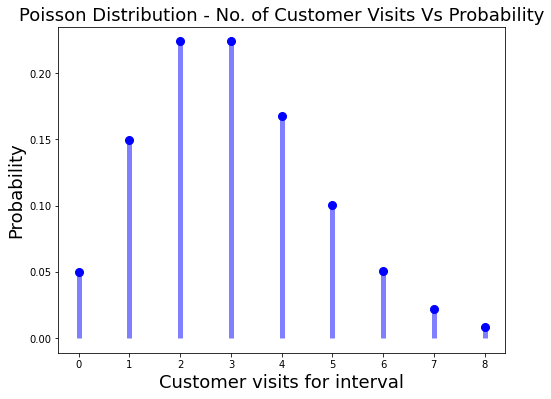

In [29]:
# Probability values
#
poisson_pd = scipy.stats.poisson.pmf(interval, lmbda)
# create canvas
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# plot the interval vs. probabilities
ax.plot(interval, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("Customer visits for interval", fontsize="18")
plt.title("Poisson Distribution - No. of Customer Visits Vs Probability", fontsize="18")
ax.vlines(interval, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

We see it is most likely a customer will most likely visit 2 or 3 times within an 8 day period. We see a positive skew that the likihood of more than 5 visits decreases. We should note this would approach the limit of 0 if we continue the interval.

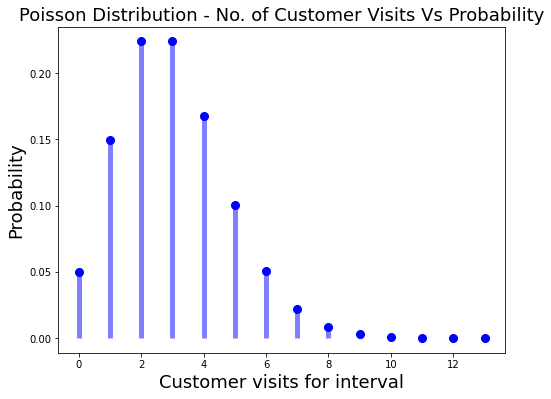

In [30]:
interval = range(14)
# Probability values
#
poisson_pd = scipy.stats.poisson.pmf(interval, lmbda)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(interval, poisson_pd, 'bo', ms=8, label='poisson pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("Customer visits for interval", fontsize="18")
plt.title("Poisson Distribution - No. of Customer Visits Vs Probability", fontsize="18")
ax.vlines(interval, 0, poisson_pd, colors='b', lw=5, alpha=0.5)

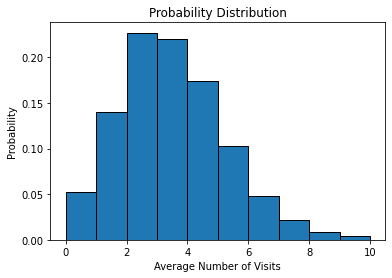

In [31]:
# visualize general distribution

#generate Poisson distribution with sample size 10000
x = scipy.stats.poisson.rvs(mu=3, size=10000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')
plt.xlabel('Average Number of Visits')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

In [32]:
x

array([4, 5, 3, ..., 4, 3, 2])

Return to lecture

## Hypergeometric Distribution


Inspection of shipment to quality control for defective products. The manager samples from one box containing 20 inventory units, suppose the manager randomly inspects five units. In the sample box, there are exactly 2 damaged units. 

Using scipy hypergeom
https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.stats.hypergeom.html

In [35]:
# define variables

N = 20 # total number of items we are drawing from
n = 5 # number of draws from N we will make
S = 2 # total number of 'success' items in N

In [33]:
def calc_hypergeometric_prob(S, n, N, x):
  """
  Calculate the hypergeometric distribution
  """
  first_term = math.factorial(S)/math.factorial(x)*math.factorial(S-x)
  second_term = math.factorial(N-S)/(math.factorial(n-x) * math.factorial(N-S-n+x))
  third_term = math.factorial(N)/(math.factorial(n) * math.factorial(N-n))
  return (first_term*second_term)/third_term

What is the probability that one out of five units used in the inspection is damaged?

In [36]:
x = 1 # number of desired items in our draw of n items
calc_hypergeometric_prob(S, n, N, x)

0.39473684210526316

In [37]:
# using scipy's function
scipy.stats.hypergeom(M=N, n=n, N=S).pmf(x)

0.3947368421052632

What is the probability that one or more units are damaged?

In [38]:
# calcualte that probability is greater than 1, so we look at 1 - P(x=0)
scipy.stats.hypergeom(M=N, n=n, N=S).pmf(0)

0.552631578947368

In [39]:
1 - scipy.stats.hypergeom(M=N, n=n, N=S).pmf(0)

0.44736842105263197

Calculate the summary statistics of mean, variance, and standard deviation.

In [40]:
scipy.stats.hypergeom.mean(M=N, n=n, N=S)

0.5

In [41]:
scipy.stats.hypergeom.var(M=N, n=n, N=S)

0.35526315789473684

In [42]:
scipy.stats.hypergeom.std(M=N, n=n, N=S)

0.5960395606792697

In [46]:
# visualize probability 
x = range(0, n+1)
rv = scipy.stats.hypergeom(M=N, n=n, N=S)
pmf_prob = rv.pmf(x)

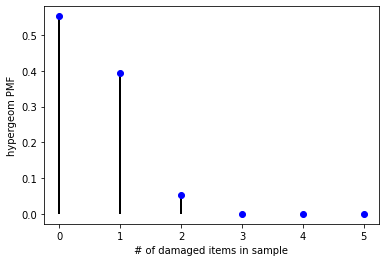

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_prob, 'bo')
ax.vlines(x, 0, pmf_prob, lw=2)
ax.set_xlabel('# of damaged items in sample')
ax.set_ylabel('hypergeom PMF')
plt.show()

# Demonstration of Distributions

## Visualize distributions and calculate the expected value, variance, and standard deviation

Generate 100 samples of different sizes from 3 different distributions, all with the same population mean. Include =poisson, binomial and normal.

For each sample, plot the mean against the sample size.

Describe the behavior you see in the plots in terms of the law of large numbers.

Plot the distribution of all sample means as a histogram.

Code from:
https://github.com/fedhere/PUI2018_fb55/blob/master/HW4_fb55/Assignment1_solution.ipynb

In [48]:
distributions = ['binomial', 'pois', 'gaus']

In [49]:
# let's have all the distributions have the same mean of 42
my_mean = 42

In [50]:
# make dictionary for each distribution
md = {}
for k in distributions: 
    md[k] = {} 

In [51]:
md

{'binomial': {}, 'gaus': {}, 'pois': {}}

In [52]:
def create_distributions(distName, distFunc, distPars, 
                         distSizes, plotTitle):
    '''Creates 100 samples of different sizes into a dictionary
    Arguments: 
        distName: name of the distribution, string
        distFunc: the function that creates the distribution
        distPars: parameters of the distribution, tuple
        distSizes: sizes of the distributions, array
        plotTitle: title of the plot, string
    Return:
        a dictionary containing:
            the distibutions as size-distribution key-value pairs
            the mean of each distribution, 
                key:'means', value: array of means
    '''
    distrib = {}
    for n in distSizes:
        if distName == 'normal':
            distrib[n] = distPars[1]* distFunc(n) + distPars[0]
        else:     
            distrib[n] = distFunc(*distPars, size=n)
        
    distrib['means'] = {}
    ax = plt.figure(figsize=(10,6)).add_subplot(111)

    for nn in distrib:
        if not type(nn) == str:
            distrib['means'][nn] = distrib[nn].mean()
            #and plot it
            ax.plot(nn, distrib['means'][nn], 'o')
            ax.set_xlabel('sample size', fontsize=18)
            ax.set_ylabel('sample mean', fontsize=18)
            ax.set_title(plotTitle, fontsize=18)
            ax.plot([min(distSizes), max(distSizes)], [my_mean, my_mean], 'k')
    return distrib

In [53]:
def plotOneDistHistogram(distDic, histTitle):
    '''Function to plot a histogram of a distribution
    Argumens:
        distDic: dictionary containing N a distribution 
        histTitle: title of the histogram plot
    '''
    allmeans = list(distDic['means'].values())

    plt.figure(figsize=(10, 10))
    plt.hist(allmeans, bins=30)
    plt.plot([my_mean, my_mean], plt.ylim(), 'k-')
    plt.xlabel('sample mean', fontsize = 18)
    plt.ylabel('Frequency of sample mean', fontsize = 18)
    plt.title(histTitle, fontsize=20)

Create array of 100 different values that are greater than 10 and less than 2000 for each of the distributions. 

In [61]:
# array of sizes
mysizes = (np.linspace(10, np.sqrt(2000), 100)**2).astype(int)

In [62]:
mysizes[:5]

array([100, 107, 114, 122, 130])

In [63]:
len(mysizes)

100

In [64]:
mysizes.min()

100

In [65]:
mysizes.max()

2000

## Binomial Distribution

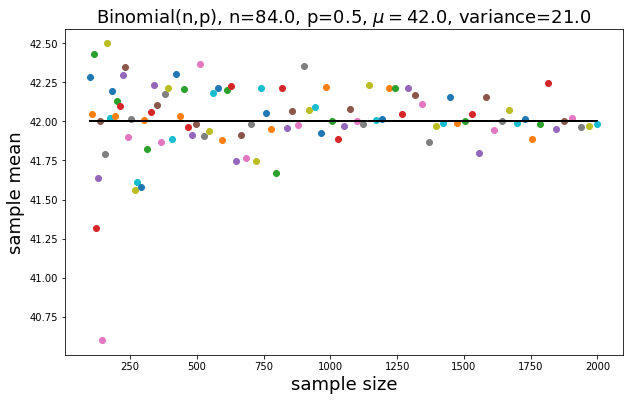

In [66]:
binom_p = 0.5
binom_n = my_mean / binom_p

md['binomial'] = create_distributions('binomial', np.random.binomial, 
                                      (binom_n, binom_p), 
                                       mysizes, 
                                      r'Binomial(n,p), '+\
                                      r'n=%.1f, '%binom_n + \
                                      r'p=%.1f, '%binom_p + \
                                      r'$\mu=%.1f$, '%(binom_n * 
                                                      binom_p) +\
                                      r'variance=$%.1f$'%(binom_n * 
                                                        binom_p * 
                                                        (1 - binom_p)))

This shows the distribution of points around the mean of 42 from the binomial distribution. We see as the sample size increases the sample mean gets closer to the true mean of 42.

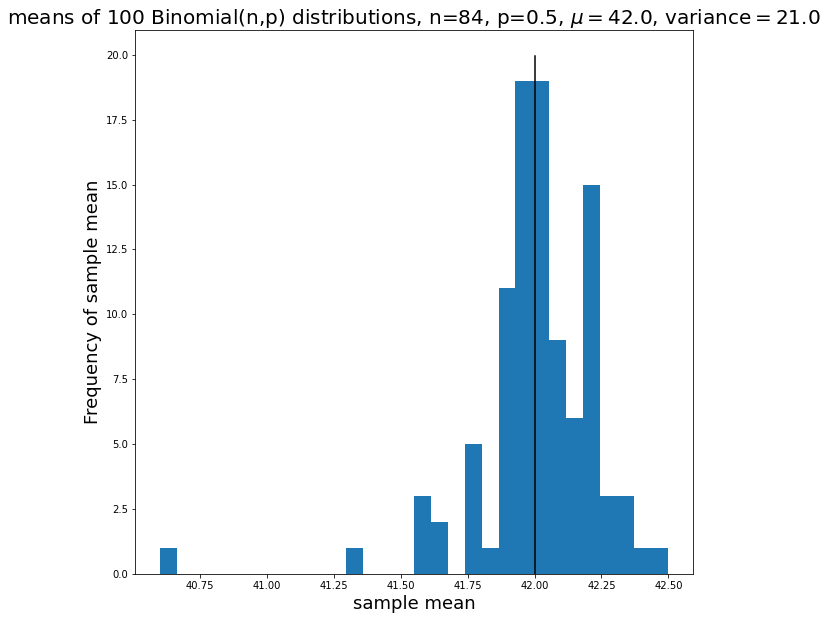

In [67]:
plotOneDistHistogram(md['binomial'], 
                     r"means of 100 Binomial(n,p) distributions, " +\
                     "n=%1.f, p=%.1f, "%(binom_n, binom_p) +\
                     "$\mu=%.1f$, "%(binom_n * binom_p) +\
                     "variance$=%.1f$"%(binom_n * binom_p*(1 - binom_p)))

We see that the curve looks like a normal distribution, this is because we gave a probability of .5. This provides a demonstration of the law of large numbers that taking the random sample from a binomial distribution we see most of the values center around 42, with a variance of 21 or standard deviation of 4.58.

# Poisson Distribution

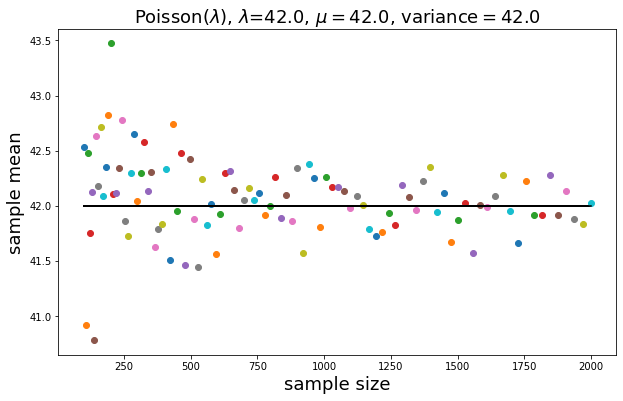

In [68]:
lam = my_mean
md['poisson'] = create_distributions('poisson', np.random.poisson, (lam,), 
                                   mysizes, 
    r'Poisson($\lambda$), $\lambda$=%.1f, $\mu=%.1f$, variance$=%.1f$'%\
                                     (lam, lam, lam))

Notice how the mean and variance are the same? The distribution of means of the sample approach the true mean as the population of N increases.

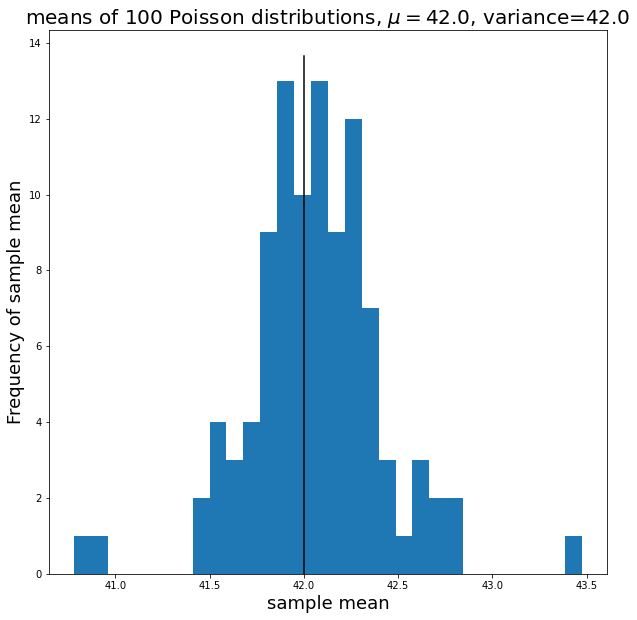

In [69]:
plotOneDistHistogram(md['poisson'], 
                     r"means of 100 Poisson distributions, " +\
                     "$\mu=%.1f$, variance=$%.1f$"%(lam, lam))

The sample means are approximately normally distributed, and the peaks at the mean of 42, this aligns with the expectation that the distribution of means approximates the true mean.

## Normal Distribution

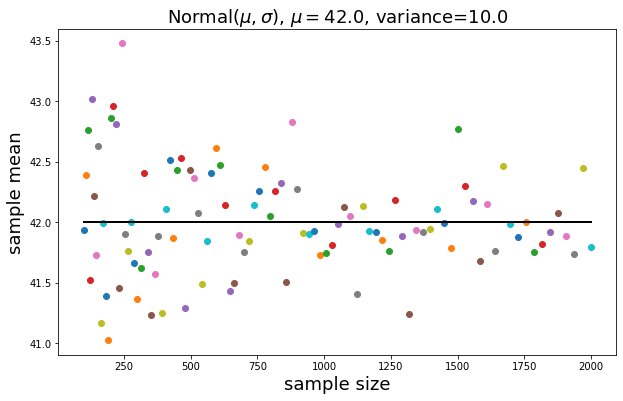

In [70]:
stdev = 10
md['normal'] = create_distributions('normal', np.random.randn, 
                                    (my_mean, stdev), mysizes, 
                r'Normal($\mu, \sigma$), $\mu=%.1f$, variance=$%.1f$'\
                     %(my_mean, stdev))

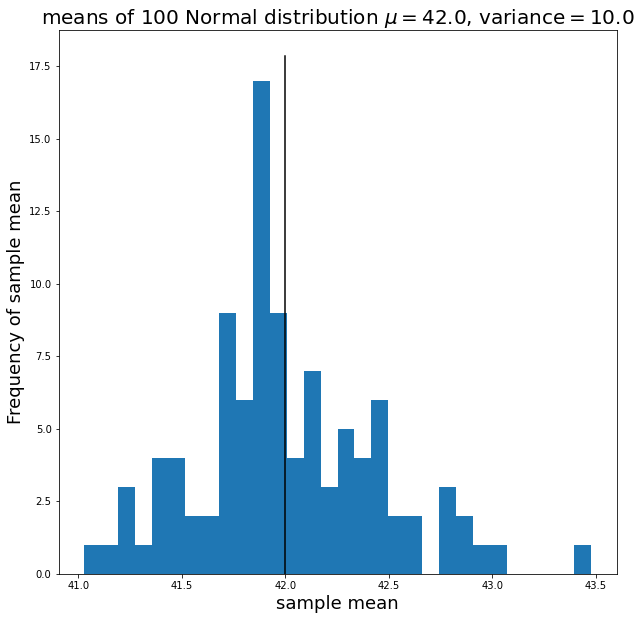

In [71]:
plotOneDistHistogram(md['normal'], 
            r"means of 100 Normal distribution $\mu=%.1f$, "%my_mean + 
                     "variance$=%.1f$"%stdev)